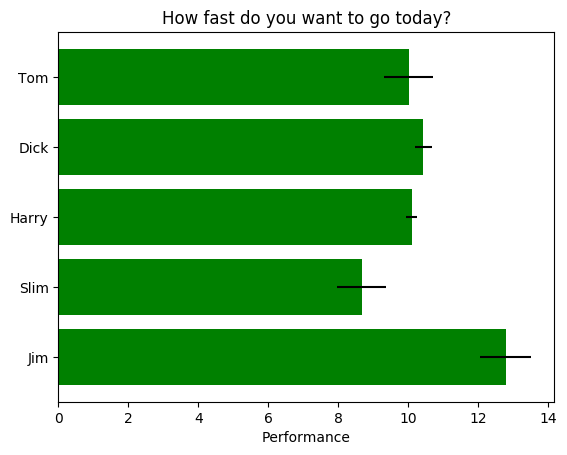

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

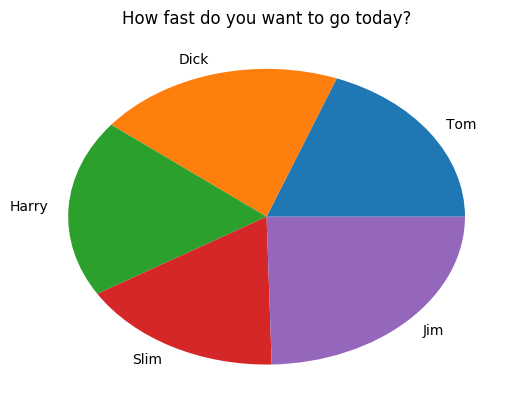

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


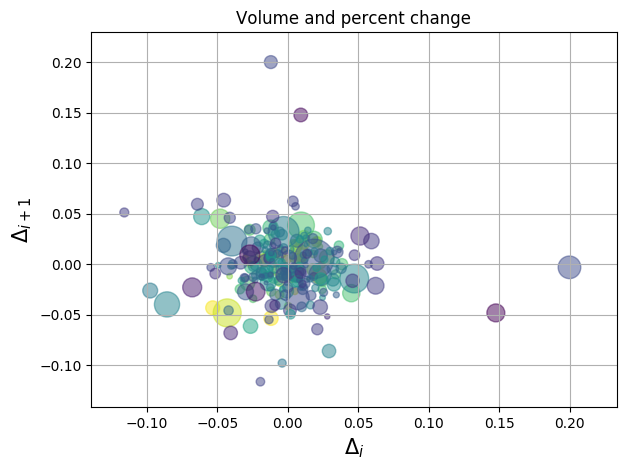

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

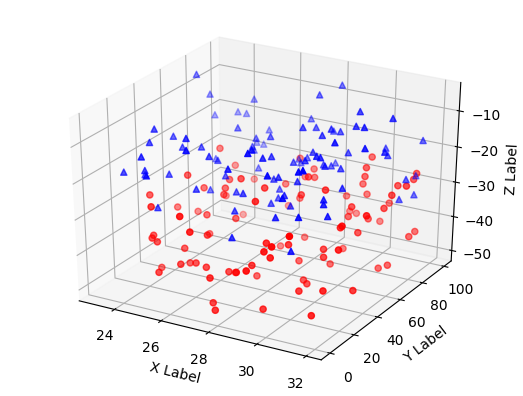

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Link to lecture notes: https://colab.research.google.com/drive/1nv8fKjT-WesLmrY904rDM9nZMB0samnK

Loading Data from OpenStreetMap with Python and the Overpass API [towardsdatascience](https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0)
 * mentions `pyosmium` ([docs](https://osmcode.org/pyosmium/))

Easy OpenStreetMap tile displaying for Python [StackOverflow](https://stackoverflow.com/questions/28476117/easy-openstreetmap-tile-displaying-for-python)
* mentions `geotiler` ([docs](https://wrobell.dcmod.org/geotiler))
  * couldn't install in colab due to `configuration file /root/.config/geotiler/geotiler.ini does not exist`

How to plot data on maps in Jupyter using Matplotlib, Plotly, and Bokeh [bigendiandata](https://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/)

Mapping Geo Data [bokeh](https://bokeh.pydata.org/en/latest/docs/user_guide/geo.html)

Plotly Python Open Source Graphing Library Maps [plot.ly](https://plot.ly/python/maps/)

`cartopy` ([docs](https://scitools.org.uk/cartopy/docs/latest/))

Open Street Map Tiles [wiki](https://wiki.openstreetmap.org/wiki/Tiles)
* Python tile look-up [wiki](https://wiki.openstreetmap.org/wiki/Slippy_map_tilenames#Python)

In [0]:
# >/dev/null for silent install
!pip install geotiler >/dev/null

In [0]:
import math

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# import some data I gathered on Chicago's trains
df = pd.read_csv('https://raw.githubusercontent.com/chrisluedtke/led-transit-map/master/cta_activity_10mins.csv')


def deg2num(lat_deg, lon_deg, zoom):
    lat_rad = math.radians(lat_deg)
    n = 2.0 ** zoom
    xtile = int((lon_deg + 180.0) / 360.0 * n)
    ytile = int(
        (1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi)
        / 2.0 * n
    )
    
    return (xtile, ytile)


def num2deg(xtile, ytile, zoom):
    """Returns the lat,lon NW-corner of the square.
    
    Use the function with xtile+1 and/or ytile+1 to get the other corners. 
    With xtile+0.5 & ytile+0.5 it will return the center of the tile.
    """
    n = 2.0 ** zoom
    lon_deg = xtile / n * 360.0 - 180.0
    lat_rad = math.atan(math.sinh(math.pi * (1 - 2 * ytile / n)))
    lat_deg = math.degrees(lat_rad)
    
    return (lat_deg, lon_deg)

  
def point_to_osm(lat, lon, zoom):
    xtile, ytile = deg2num(lat, lon, zoom)

    tile_url = f'https://tile.openstreetmap.org/{zoom}/{xtile}/{ytile}.png'

    nw_pt_latlon = num2deg(xtile, ytile, osm_zoom)
    se_pt_latlon = num2deg(xtile+1, ytile+1, osm_zoom)
    
    sct = sns.scatterplot(x='lon', y='lat',
                          data=pd.DataFrame({'lat':[lat], 'lon':[lon]}))
    
    sct.set(xlim=(nw_pt_latlon[1], se_pt_latlon[1]),
            ylim=(se_pt_latlon[0], nw_pt_latlon[0]))
    
#     print(nw_pt_latlon)
#     print(se_pt_latlon)
#     print(abs(nw_pt_latlon[0]-se_pt_latlon[0]))
#     print(abs(nw_pt_latlon[1]-se_pt_latlon[1]))

    sct.imshow(mpimg.imread(tile_url),
               aspect = sct.get_aspect(),
               extent = sct.get_xlim() + sct.get_ylim(),
               zorder = 0)
    plt.show()

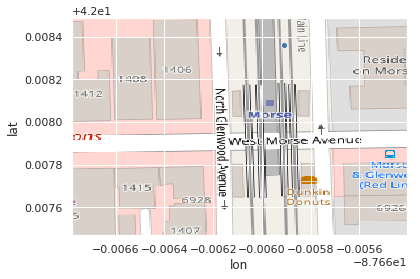

In [107]:
# helpful stackoverflow: https://stackoverflow.com/questions/50091591/plotting-seaborn-heatmap-on-top-of-a-background-picture
point_to_osm(42.00836, -87.66591, 18)